In [40]:
#Varibles explored:
# librac: If some people in your community suggested that a book this person wrote which said Blacks are inferior should be taken out of your public library, would you favor removing this book, or not?
# libracy: (Gender netural version)(Or consider a person who believes that Blacks are genetically inferior…) If some people in your community suggested that a book this person wrote which said Blacks are inferior should be taken out of your public library, would you favor removing this book, or not?
# libmslm: (Now consider a Islamic religious leader who preaches hatred of the United States…) If some people in your community suggested that a book this person wrote which preaches hatred of the United States should be taken out of your public library, would you favor removing this book, or not?
# libmsly: (Gender netural version) (Now consider a Islamic religious leader who preaches hatred of the United States…) If some people in your community suggested that a book this person wrote which preaches hatred of
# libath: (There are always some people whose ideas are considered bad or dangerous by other people. For instance, somebody who is against all churches and religion…) If some people in your community suggested that a book this person wrote against churches and religion should be taken out of your public library, would you favor removing this book, or not?
# libathy: (Gender nutural version) (There are always some people whose ideas are considered bad or dangerous by other people. For instance, somebody who is against all churches and religion…) If some people in your community suggested that a book this person wrote against churches and religion should be taken out of your public library, would you favor removing this book, or not?
# partyid: Generally speaking, do you usually think of yourself as a Republican, Democrat, Independent, or what?



In [41]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
#import data
import pandas as pd

var_list = ['libracy', 'librac', 'libmslmy', 'libmslm', 'libathy', 'libath', 'partyid', 'year']
output_file = 'gss_data_url.csv'
modes = ['w', 'a']
phase = 0

for k in range(37):
    url = 'https://github.com/DS3001/gss_zip/raw/main/gss_' + str(1 + k) + '.csv'
    print(url)
    df = pd.read_csv(url, low_memory=False)

    if phase == 0:

        df[var_list].to_csv(output_file, mode=modes[phase], header=True, index=False)
    else:

        df[var_list].to_csv(output_file, mode=modes[phase], header=False, index=False)

    phase = 1
    k += 1


https://github.com/DS3001/gss_zip/raw/main/gss_1.csv
https://github.com/DS3001/gss_zip/raw/main/gss_2.csv
https://github.com/DS3001/gss_zip/raw/main/gss_3.csv
https://github.com/DS3001/gss_zip/raw/main/gss_4.csv
https://github.com/DS3001/gss_zip/raw/main/gss_5.csv
https://github.com/DS3001/gss_zip/raw/main/gss_6.csv
https://github.com/DS3001/gss_zip/raw/main/gss_7.csv
https://github.com/DS3001/gss_zip/raw/main/gss_8.csv
https://github.com/DS3001/gss_zip/raw/main/gss_9.csv
https://github.com/DS3001/gss_zip/raw/main/gss_10.csv
https://github.com/DS3001/gss_zip/raw/main/gss_11.csv
https://github.com/DS3001/gss_zip/raw/main/gss_12.csv
https://github.com/DS3001/gss_zip/raw/main/gss_13.csv
https://github.com/DS3001/gss_zip/raw/main/gss_14.csv
https://github.com/DS3001/gss_zip/raw/main/gss_15.csv
https://github.com/DS3001/gss_zip/raw/main/gss_16.csv
https://github.com/DS3001/gss_zip/raw/main/gss_17.csv
https://github.com/DS3001/gss_zip/raw/main/gss_18.csv
https://github.com/DS3001/gss_zip/raw

In [ ]:
#Looking at data
df = pd.read_csv(output_file)
df.shape[0] #amount of orginal rows 72390

72390

In [ ]:
print(df['librac'].unique())
print(df['libmslm'].unique())
print(df['libath'].unique())
print(df['partyid'].unique())
print(df['year'].unique())

[nan 'remove' 'not remove']
[nan 'not remove' 'remove']
['not remove' 'remove' nan]
['independent, close to democrat' 'not very strong democrat'
 'independent (neither, no response)' 'strong democrat'
 'not very strong republican' 'independent, close to republican'
 'strong republican' 'other party' nan]
[1972 1973 1974 1975 1976 1977 1978 1980 1982 1983 1984 1985 1986 1987
 1988 1989 1990 1991 1993 1994 1996 1998 2000 2002 2004 2006 2008 2010
 2012 2014 2016 2018 2021 2022]


In [43]:
# The code book states that for 'librac','libmslm', 'libath' there should be both a label 'remove' and 'not reme'
# As well as 'reserved codes' like 'don't know', 'not applicable', 'skipped on web' it seems that the reserved data is not in the dataset

In [44]:
na_counts = df[['librac','libmslm', 'libath', 'partyid', 'year']].isna().sum()
print(na_counts)

librac     272
libmslm    272
libath     273
partyid      2
year         0
dtype: int64


In [45]:
# Group by 'year' and count values for each variable
df.groupby('year')[['librac','libracy','libmslm','libmslmy', 'libath', 'libathy', 'partyid']].count()





,librac,libracy,libmslm,libmslmy,libath,libathy,partyid
year,,,,,,,
2022,118,137,118,139,117,139,388


In [39]:
#I wanted to compare the responses to the gender-neutral question with the original question by using cross-tabulation to see if changing the wording of the question to remove gender-specific language had an impact on individual responses. The cross-tabulation results revealed that there is a distinct separation between respondents who chose 'not remove' and 'remove' responses for both variables. This indicates that individuals who selected 'not remove' for one variable tended to do the same for the other variable, and the same trend held for 'remove' responses.
cross_tab_librac = pd.crosstab(df['librac'], df['libracy'])
print(cross_tab_librac)
cross_tab_libmslm = pd.crosstab(df['libmslm'], df['libmslmy'])
print(cross_tab_libmslm)
cross_tab_libmslm = pd.crosstab(df['libath'], df['libathy'])
print(cross_tab_libmslm)

KeyError: ignored

In [ ]:
#I'm going to combine the orginial variable with the Gender Neutral Wording version to diminish the lack of data point


In [ ]:
df['librac'] = df['librac'].mask(df['librac'].isna(), df['libracy'])
df['libmslm'] = df['libmslm'].mask(df['libmslm'].isna(), df['libmslmy'])
df['libath'] = df['libath'].mask(df['libath'].isna(), df['libathy'])

df.to_csv('raw_gss_data_url.csv', index=False)


In [ ]:
na_counts = df[['librac','libmslm', 'libath', 'partyid', 'year']].isna().sum()
print(na_counts)
df.shape[0]

librac     31848
libmslm    58475
libath     27198
partyid      485
year           0
dtype: int64


72390

In [ ]:
#I'm going to drop all rows were 'librac','libmslm', 'libath' have missing data

In [ ]:
df = df.dropna(subset=['librac', 'libmslm', 'libath'], how='all') #the how= 'all' I looked up and W3Schools explained it

In [ ]:
na_counts = df[['librac','libmslm', 'libath', 'partyid', 'year']].isna().sum()
print(na_counts)

librac      5264
libmslm    31891
libath       614
partyid      310
year           0
dtype: int64


In [ ]:
#To get ride of the last two missing data points I'm going to drop from 'libath' and 'partyid'

In [ ]:
df = df.dropna(subset=['libath', 'partyid'])

In [ ]:
na_counts = df[['librac','libmslm', 'libath', 'partyid', 'year']].isna().sum()
print(na_counts)

librac      5158
libmslm    31289
libath         0
partyid        0
year           0
dtype: int64


In [ ]:
df = df.dropna(subset=['librac'])

In [ ]:
na_counts = df[['librac','libmslm', 'libath', 'partyid', 'year']].isna().sum()
print(na_counts)

librac         0
libmslm    26293
libath         0
partyid        0
year           0
dtype: int64


In [ ]:
#libmslm: recorded since 2008,librac: recorded since 1976, libath: recorded since 1972, partyid: recorded since 1972
#because libmslm began being recorded so much later then the other questions I'm going to make two different tables, one that excludes libmslm and one that includes libmslm

church_race = df[['librac', 'libath', 'partyid','year']]
church_race.to_csv('church_race.csv', index=False)




In [ ]:
# Group by 'year' and count values for each variable
church_race.groupby('year')[['librac', 'libath', 'partyid']].count()


In [ ]:
df = df.dropna(subset=['libmslm'])
church_race_religion = df[['librac', 'libmslm', 'libath', 'partyid', 'year']]
church_race_religion.to_csv('church_race_religion.csv', index=False)


In [ ]:
na_counts = church_race_religion[['librac','libmslm', 'libath', 'partyid', 'year']].isna().sum()
print(na_counts)

librac     0
libmslm    0
libath     0
partyid    0
year       0
dtype: int64


In [ ]:
# Group by 'year' and count values for each variable
church_race.groupby('year')[['librac','libath', 'partyid']].count()


NameError: ignored

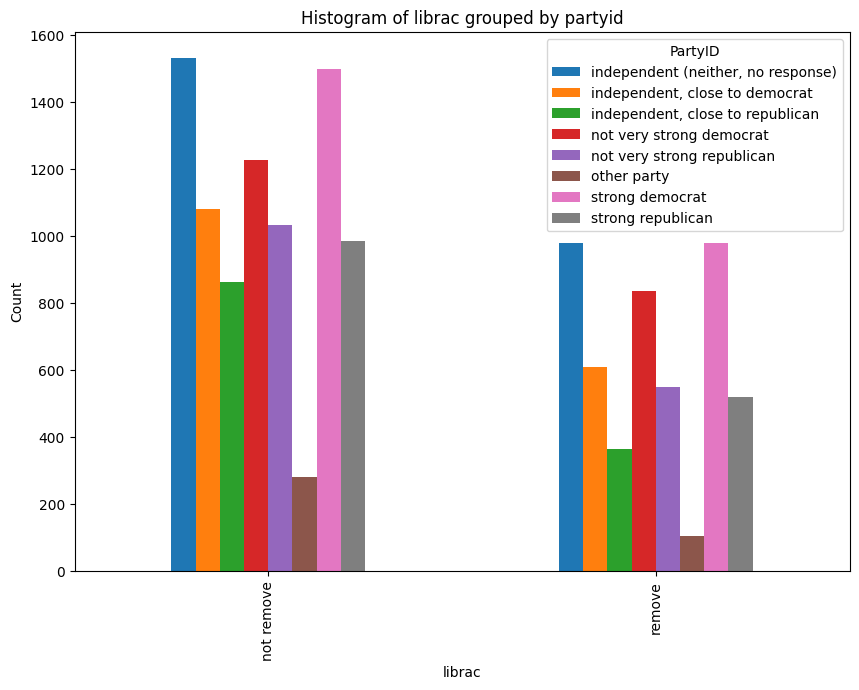

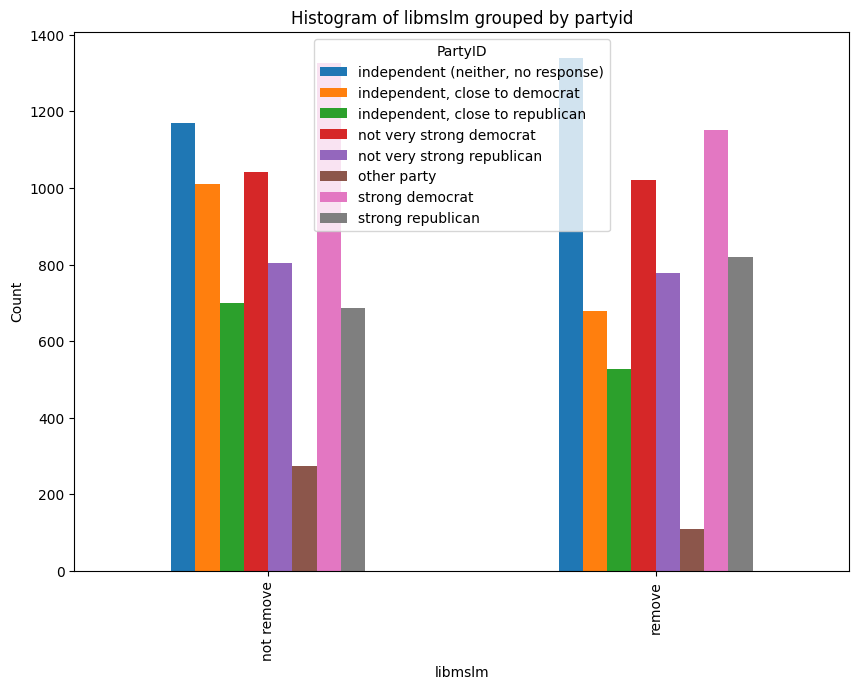

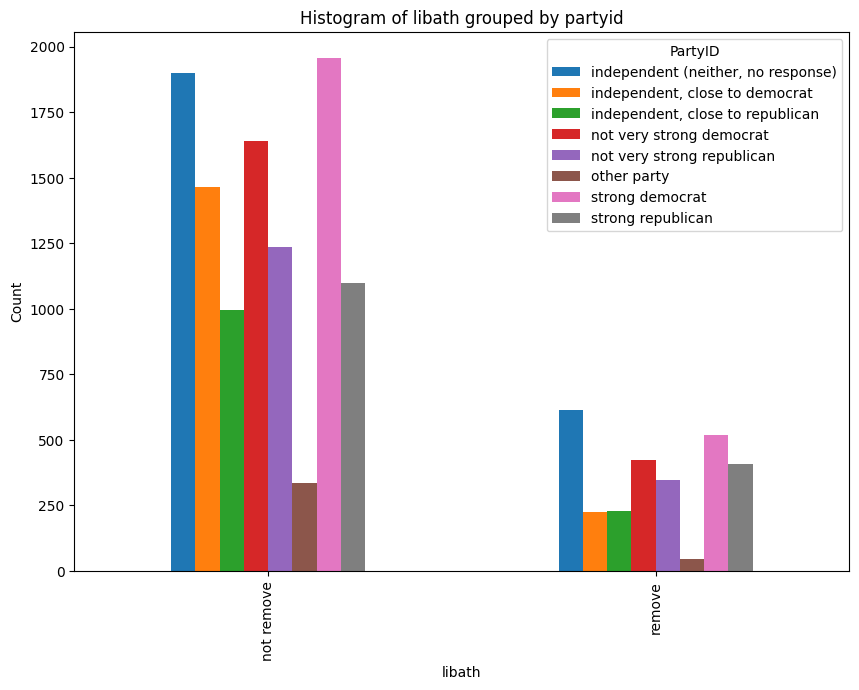

In [ ]:


columns_to_plot = ['librac', 'libmslm', 'libath']

for col in columns_to_plot:

    cross = pd.crosstab(church_race_religion[col], church_race_religion['partyid'])


    cross.plot(kind='bar', stacked=False, figsize=(10, 7))

    plt.title(f'Histogram of {col} grouped by partyid')
    plt.ylabel('Count')
    plt.xlabel(col)
    plt.legend(title='PartyID')
    plt.show()


In [ ]:
columns_to_crosstab = ['librac', 'libmslm', 'libath']
df = church_race_religion
for col in columns_to_crosstab:
    # Crosstab with original party groupings
    cross_original = pd.crosstab(df[col], df['partyid'], margins=True, margins_name="Total")
    print(f'Crosstab of {col} with original partyid:')
    print(cross_original)
    print('-'*50)

In [57]:
# I'm going to group partyid we can change the grouping if there is way you would think would be better

party_grouping = {
    'independent, close to democrat': 'independent/other party',
    'independent (neither, no response)': 'independent/other party',
    'independent, close to republican': 'independent/other party',
    'other party': 'independent/other party',
    'strong republican': 'republican',
    'not very strong republican': 'republican',
    'strong democrat': 'democrat',
    'not very strong democrat': 'democrat'
}

org_party_church_race_religion = church_race_religion.copy()
org_party_church_race_religion['party_grouped'] = org_party_church_race_religion['partyid'].replace(party_grouping)
org_party_church_race_religion['AntiBlackBook'] = org_party_church_race_religion['librac']
org_party_church_race_religion['AntiUSABook'] = org_party_church_race_religion['libmslm']
org_party_church_race_religion['AntiChurchBook'] = org_party_church_race_religion['libath']
org_party_church_race_religion.to_csv('org_party_church_race_religion.csv', index=False)

In [51]:
#I'm going to calculate the percentage of "remove" responses vs. "not remove" responses for each year for each varible I'm going to do this by melting the data this was in the reading for the first homework and in the vizualization week

melted_org_party_church_race_religion = org_party_church_race_religion.melt(id_vars=['year', 'party_grouped'], value_vars=['AntiBlackBook', 'AntiUSABook', 'AntiChurchBook'],
                    var_name='question', value_name='response')

proportions_by_party_response = melted_org_party_church_race_religion.groupby(['party_grouped', 'question', 'response', 'year']).size() / melted_org_party_church_race_religion.groupby(['party_grouped', 'year', 'question']).size()
proportions_by_party_response = proportions_by_party_response.reset_index(name='proportion_party_grouped') #we have a column named "proportion_party_grouped" which contains the proportions we are finding
print(proportions_by_party_response, '\n')


    party_grouped       question  year    response  proportion_party_grouped
0        democrat  AntiBlackBook  2008  not remove                  0.657596
1        democrat  AntiBlackBook  2008      remove                  0.342404
2        democrat  AntiBlackBook  2010  not remove                  0.667500
3        democrat  AntiBlackBook  2010      remove                  0.332500
4        democrat  AntiBlackBook  2012  not remove                  0.622989
..            ...            ...   ...         ...                       ...
139    republican    AntiUSABook  2018      remove                  0.494012
140    republican    AntiUSABook  2021  not remove                  0.507589
141    republican    AntiUSABook  2021      remove                  0.492411
142    republican    AntiUSABook  2022  not remove                  0.482474
143    republican    AntiUSABook  2022      remove                  0.517526

[144 rows x 5 columns] 



Results Section Code:

In [65]:

pivot_df = proportions_by_party_response.pivot_table(index=['question', 'party_grouped', 'year'],
                          columns='response', values='proportion_party_grouped', fill_value=0)
pivot_df


response                          not remove    remove
question      party_grouped year                      
AntiBlackBook democrat      2008    0.657596  0.342404
                            2010    0.667500  0.332500
                            2012    0.622989  0.377011
                            2014    0.584229  0.415771
                            2016    0.622400  0.377600
...                                      ...       ...
AntiUSABook   republican    2014    0.469101  0.530899
                            2016    0.472422  0.527578
                            2018    0.505988  0.494012
                            2021    0.507589  0.492411
                            2022    0.482474  0.517526

[72 rows x 2 columns]

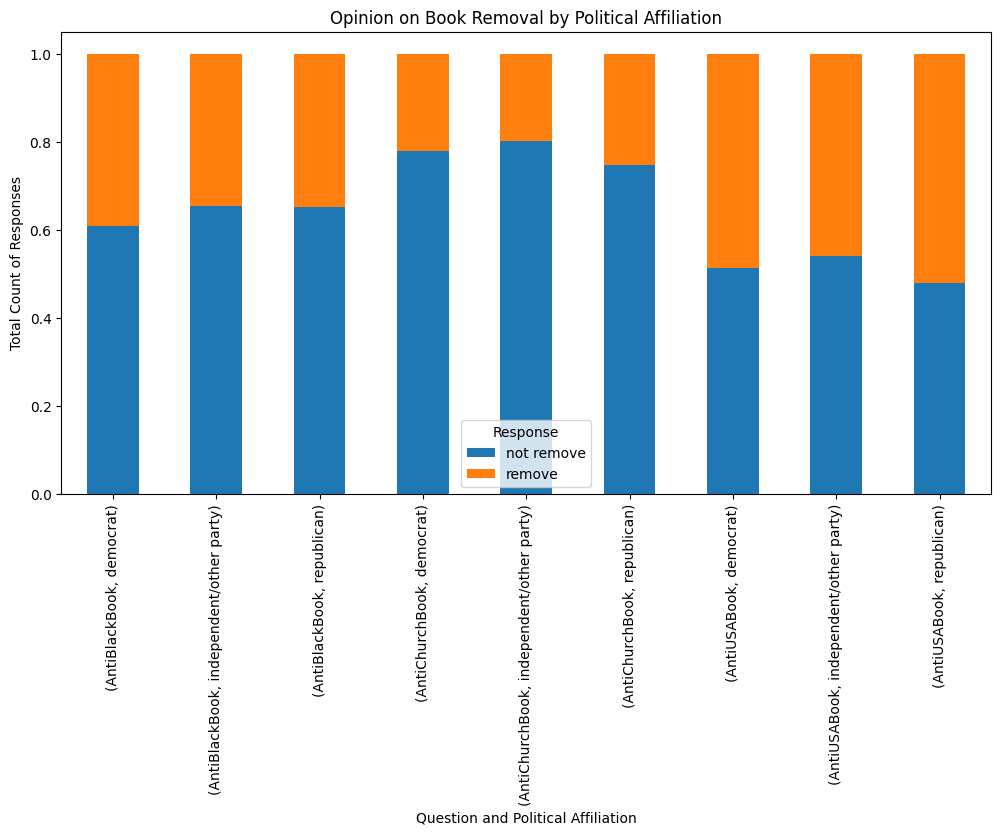

In [60]:
pivot_df.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Opinion on Book Removal by Political Affiliation')
plt.xlabel('Question and Political Affiliation')
plt.ylabel('Total Count of Responses')
plt.legend(title='Response')

plt.show()

<Axes: xlabel='proportion_party_grouped', ylabel='response'>

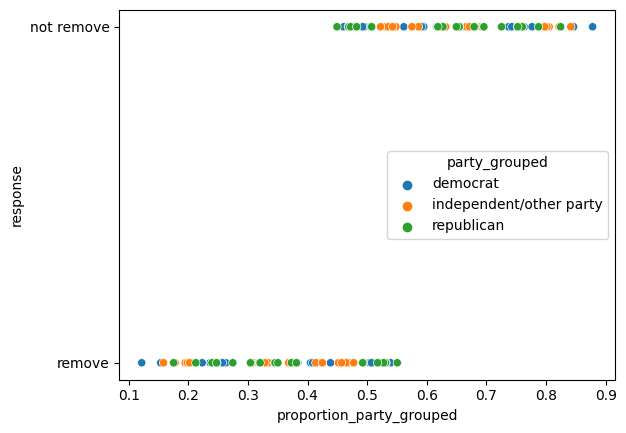

In [62]:
sns.scatterplot(data=proportions_by_party_response, x='proportion_party_grouped', y='response',hue='party_grouped')


<Axes: xlabel='party_grouped', ylabel='proportion_party_grouped'>

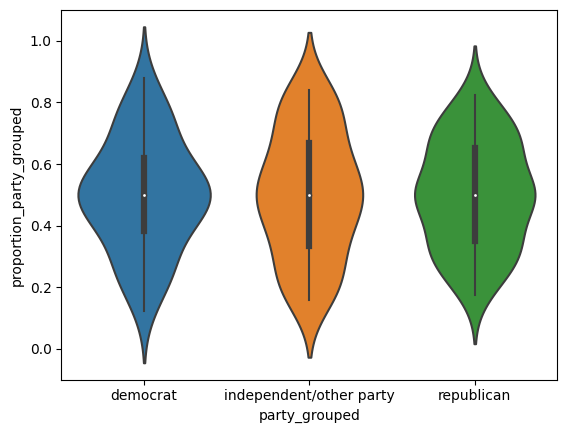

In [64]:
sns.violinplot(x='party_grouped',y='proportion_party_grouped',data=proportions_by_party_response)


Summary of Data:

In [ ]:
responses_summary = church_race_religion[['librac', 'libmslm', 'libath']].describe()
print("Summary of responses for each question:")
print(responses_summary)
party_counts = church_race_religion['partyid'].value_counts()
print("\nNumber of people within each party:")
print(party_counts)

Summary of responses for each question:
            librac     libmslm      libath
count        13439       13439       13439
unique           2           2           2
top     not remove  not remove  not remove
freq          8501        7012       10631

Number of people within each party:
independent (neither, no response)    2512
strong democrat                       2478
not very strong democrat              2062
independent, close to democrat        1690
not very strong republican            1582
strong republican                     1506
independent, close to republican      1226
other party                            383
Name: partyid, dtype: int64


In [ ]:
# Proportions of responses ('not remove' and 'remove') for each question
libath_summary = church_race_religion['libath'].value_counts(normalize=True)
libmslm_summary = church_race_religion['libmslm'].value_counts(normalize=True)
librac_summary = church_race_religion['librac'].value_counts(normalize=True)

# Print the summaries
print("Summary for libath:")
print(libath_summary)
print("\nSummary for libmslm:")
print(libmslm_summary)
print("\nSummary for librac:")
print(librac_summary)

Summary for libath:
not remove    0.791056
remove        0.208944
Name: libath, dtype: float64

Summary for libmslm:
not remove    0.521765
remove        0.478235
Name: libmslm, dtype: float64

Summary for librac:
not remove    0.632562
remove        0.367438
Name: librac, dtype: float64


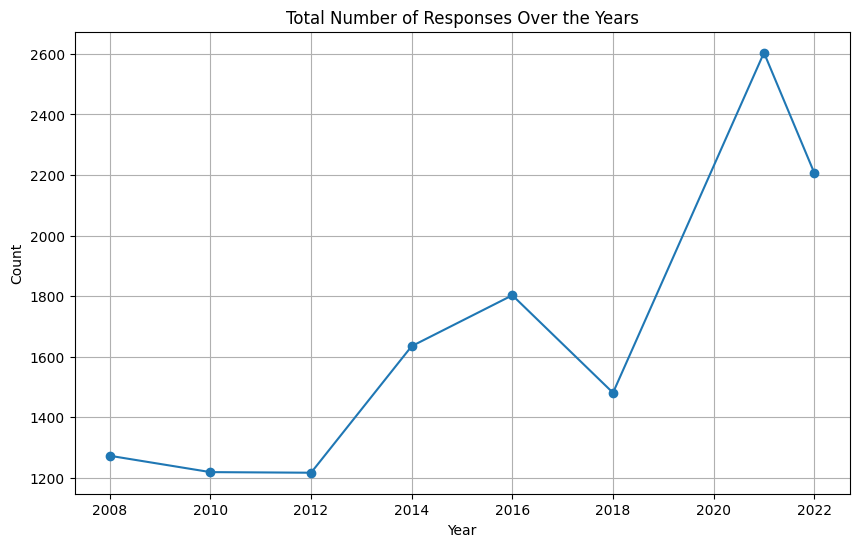

In [ ]:
#Total Number of Reponses Over Years
grouped_data = church_race_religion.groupby('year').size()

grouped_data.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Total Number of Responses Over the Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid(True)
plt.show()

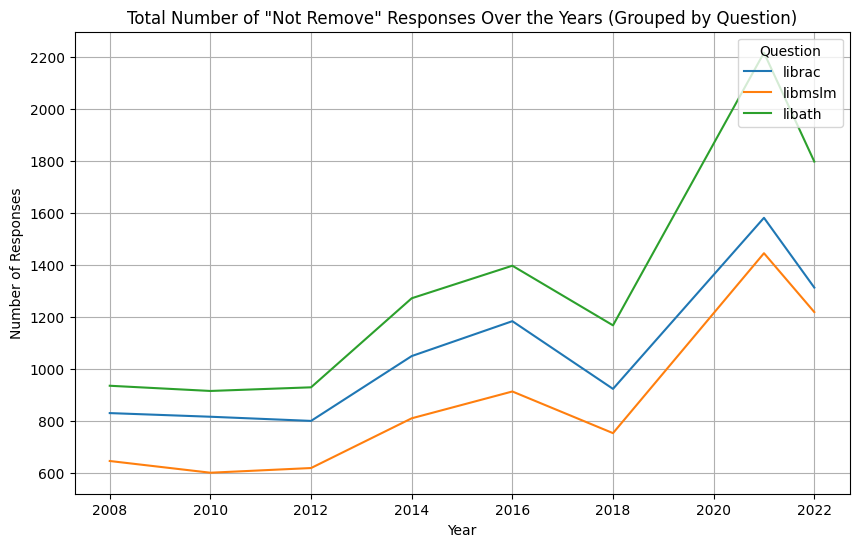

In [ ]:
# Total Number of "Not Remove" Responses Over the Years Grouped by Question

grouped_data2 = church_race_religion.groupby(['year']).agg({
    'librac': lambda x: (x == 'not remove').sum(),
    'libmslm': lambda x: (x == 'not remove').sum(),
    'libath': lambda x: (x == 'not remove').sum()
})

grouped_data2.plot(kind='line', figsize=(10, 6))
plt.title('Total Number of "Not Remove" Responses Over the Years (Grouped by Question)')
plt.xlabel('Year')
plt.ylabel('Number of Responses')
plt.grid(True)
plt.legend(title='Question', loc='upper right')
plt.show()

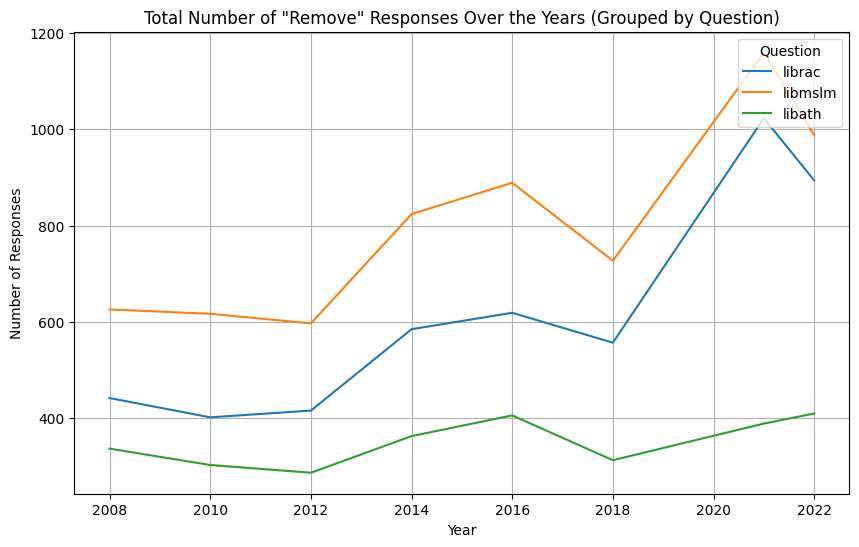

In [ ]:
# Total Number of "Remove" Responses Over the Years Grouped by Question

grouped_data3 = church_race_religion.groupby(['year']).agg({
    'librac': lambda x: (x == 'remove').sum(),
    'libmslm': lambda x: (x == 'remove').sum(),
    'libath': lambda x: (x == 'remove').sum()
})

grouped_data3.plot(kind='line', figsize=(10, 6))
plt.title('Total Number of "Remove" Responses Over the Years (Grouped by Question)')
plt.xlabel('Year')
plt.ylabel('Number of Responses')
plt.grid(True)
plt.legend(title='Question', loc='upper right')
plt.show()

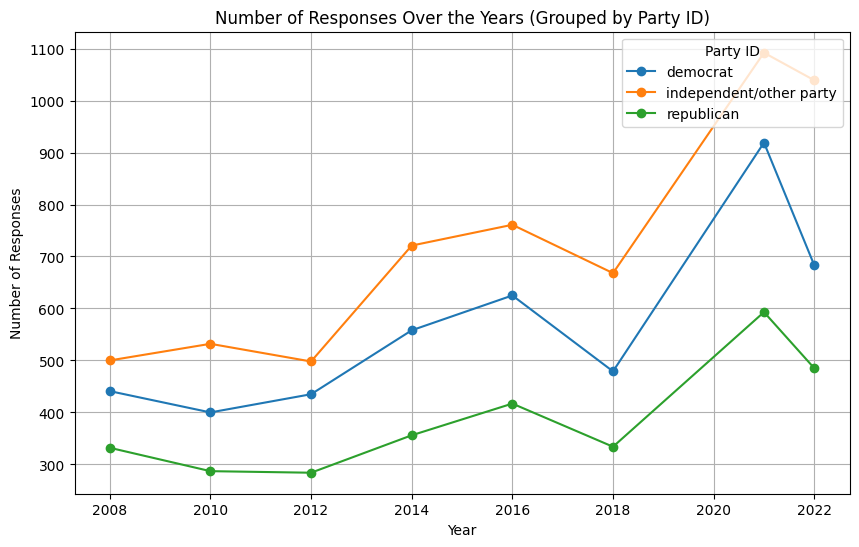

In [ ]:
# Number of Responses Grouped by Party ID
group_party = {
    'independent, close to democrat': 'independent/other party',
    'independent (neither, no response)': 'independent/other party',
    'independent, close to republican': 'independent/other party',
    'other party': 'independent/other party',
    'not very strong democrat': 'democrat',
    'not very strong republican': 'republican',
    'strong democrat': 'democrat',
    'strong republican': 'republican'
}
grouped_data4 = church_race_religion.copy()
grouped_data4["group_party"] = grouped_data4["partyid"].replace(group_party)
grouped_data4 = grouped_data4.groupby(['year', 'group_party']).size().unstack(fill_value=0)

grouped_data4.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Number of Responses Over the Years (Grouped by Party ID)')
plt.xlabel('Year')
plt.ylabel('Number of Responses')
plt.grid(True)
plt.legend(title='Party ID', loc='upper right')
plt.show()

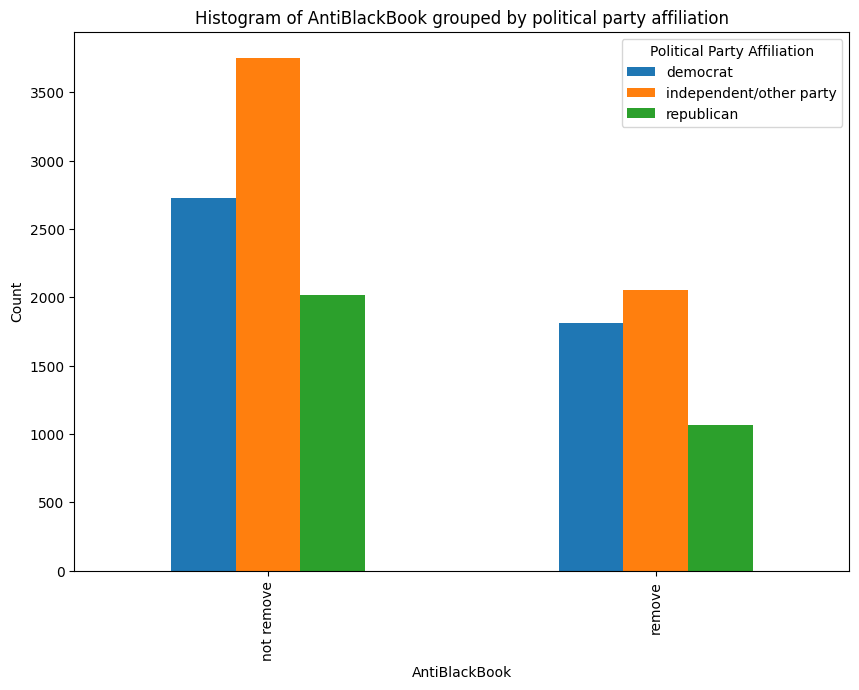

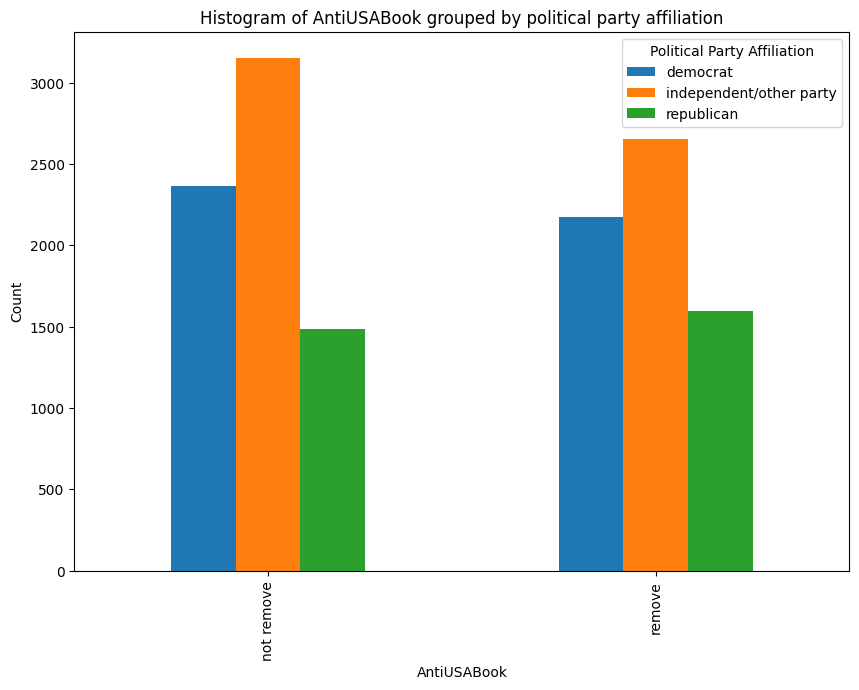

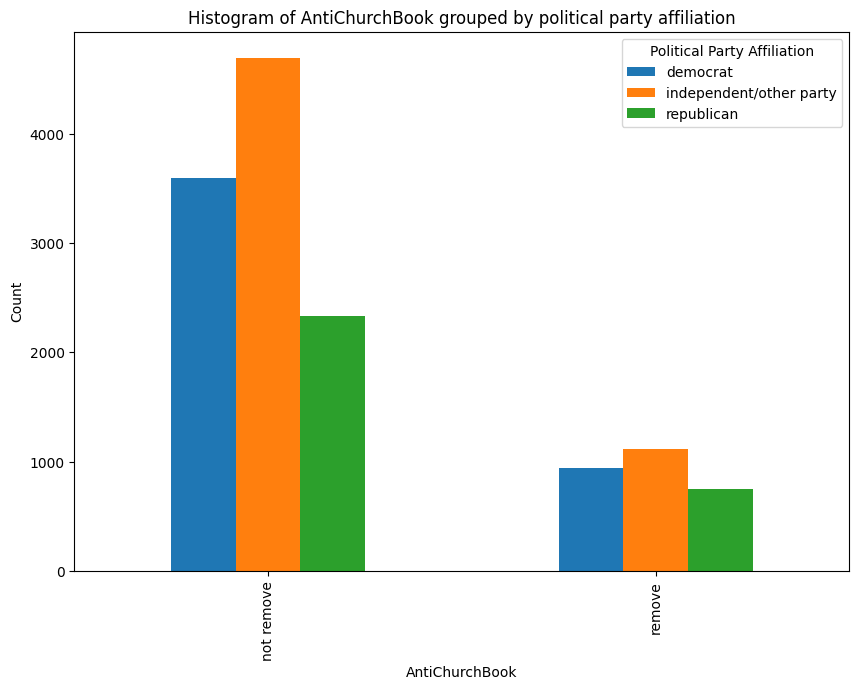

In [ ]:
columns_to_plot = ['AntiBlackBook', 'AntiUSABook', 'AntiChurchBook']

for col in columns_to_plot:

    cross = pd.crosstab(org_party_church_race_religion[col], org_party_church_race_religion['party_grouped'])


    cross.plot(kind='bar', stacked=False, figsize=(10, 7))

    plt.title(f'Histogram of {col} grouped by political party affiliation')
    plt.ylabel('Count')
    plt.xlabel(col)
    plt.legend(title='Political Party Affiliation')
    plt.show()

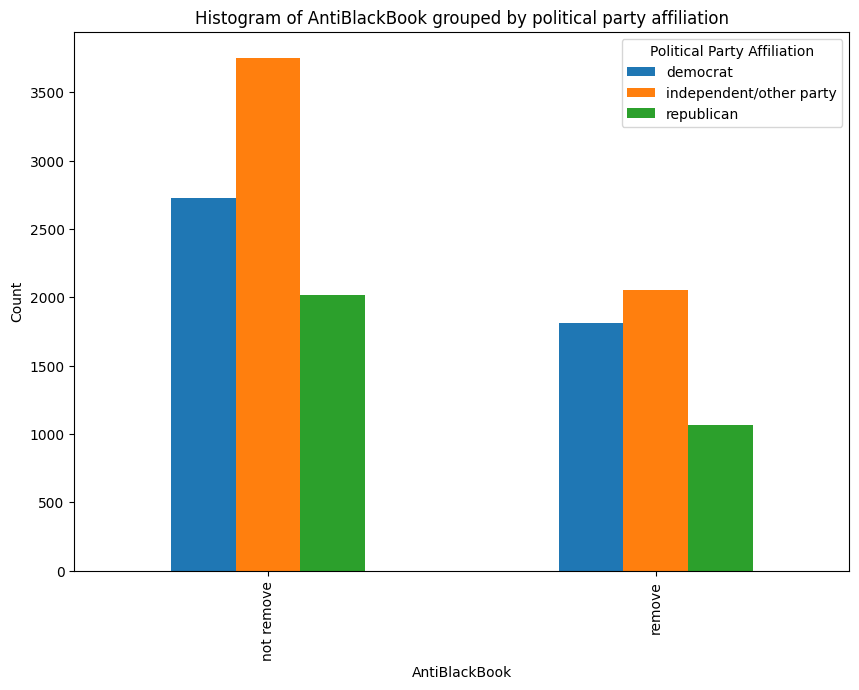

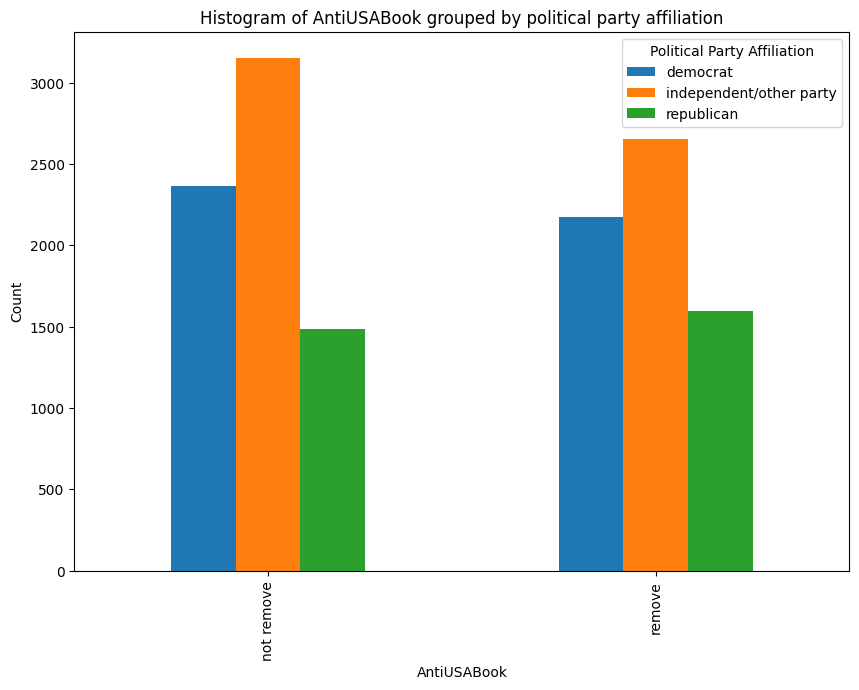

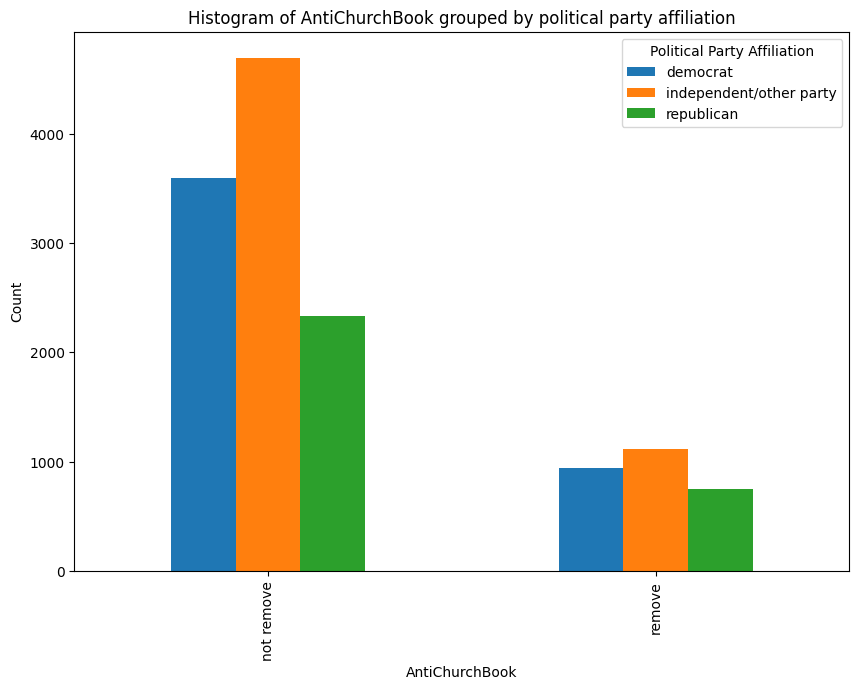

In [ ]:
columns_to_plot = ['AntiBlackBook', 'AntiUSABook', 'AntiChurchBook']

for col in columns_to_plot:

    cross = pd.crosstab(org_party_church_race_religion[col], org_party_church_race_religion['party_grouped'])


    cross.plot(kind='bar', stacked=False, figsize=(10, 7))

    plt.title(f'Histogram of {col} grouped by political party affiliation')
    plt.ylabel('Count')
    plt.xlabel(col)
    plt.legend(title='Political Party Affiliation')
    plt.show()

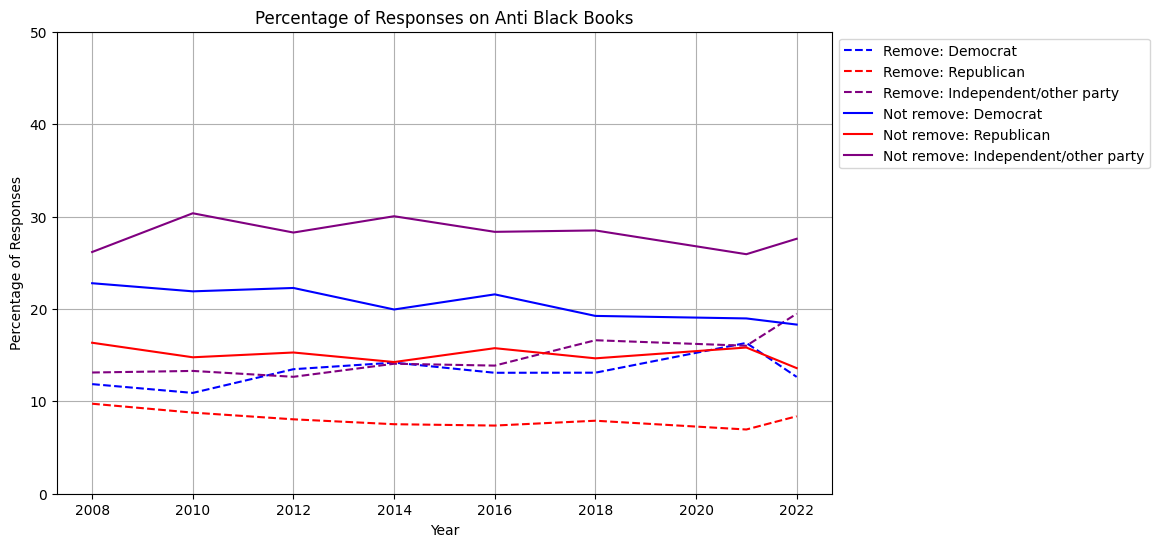

In [67]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))

colors = {'democrat': 'blue', 'republican': 'red', 'independent/other party': 'purple'}
linestyles = {'remove': '--', 'not remove': '-'}

total_counts = org_party_church_race_religion.groupby(['year']).size().reset_index(name='TotalCount')

for opinion in ['remove', 'not remove']:
    for party in ['democrat', 'republican', 'independent/other party']:
        filtered_df = org_party_church_race_religion[(org_party_church_race_religion['AntiBlackBook'] == opinion) & (org_party_church_race_religion['party_grouped'] == party)]

        response_count = filtered_df.groupby('year').size().reset_index(name='Count')
        response_count = response_count.merge(total_counts, on=['year'])
        response_count['Percentage'] = (response_count['Count'] / response_count['TotalCount']) * 100

        label = f'{opinion.capitalize()}: {party.capitalize()}'
        plt.plot(
            response_count['year'],
            response_count['Percentage'],
            label=label,
            color=colors[party],
            linestyle=linestyles[opinion]
        )

ax.set_ylim(0, 50)
plt.xlabel('Year')
plt.ylabel('Percentage of Responses')
plt.title('Percentage of Responses on Anti Black Books')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)

plt.show()

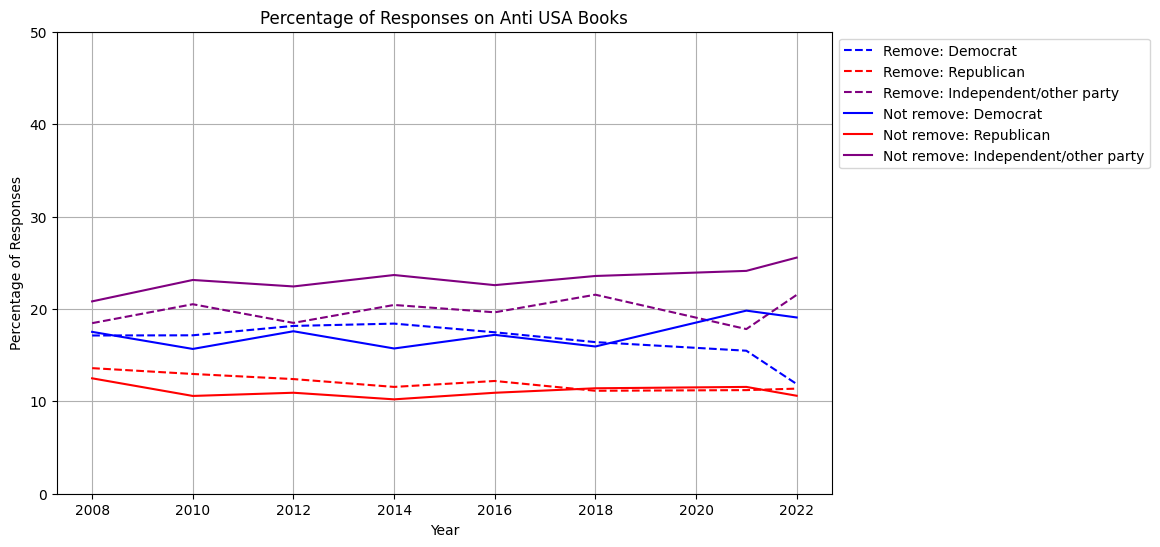

In [68]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))

colors = {'democrat': 'blue', 'republican': 'red', 'independent/other party': 'purple'}
linestyles = {'remove': '--', 'not remove': '-'}

total_counts = org_party_church_race_religion.groupby(['year']).size().reset_index(name='TotalCount')

for opinion in ['remove', 'not remove']:
    for party in ['democrat', 'republican', 'independent/other party']:
        filtered_df = org_party_church_race_religion[(org_party_church_race_religion['AntiUSABook'] == opinion) & (org_party_church_race_religion['party_grouped'] == party)]

        response_count = filtered_df.groupby('year').size().reset_index(name='Count')
        response_count = response_count.merge(total_counts, on=['year'])
        response_count['Percentage'] = (response_count['Count'] / response_count['TotalCount']) * 100

        label = f'{opinion.capitalize()}: {party.capitalize()}'
        plt.plot(
            response_count['year'],
            response_count['Percentage'],
            label=label,
            color=colors[party],
            linestyle=linestyles[opinion]
        )

ax.set_ylim(0, 50)
plt.xlabel('Year')
plt.ylabel('Percentage of Responses')
plt.title('Percentage of Responses on Anti USA Books')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)

plt.show()

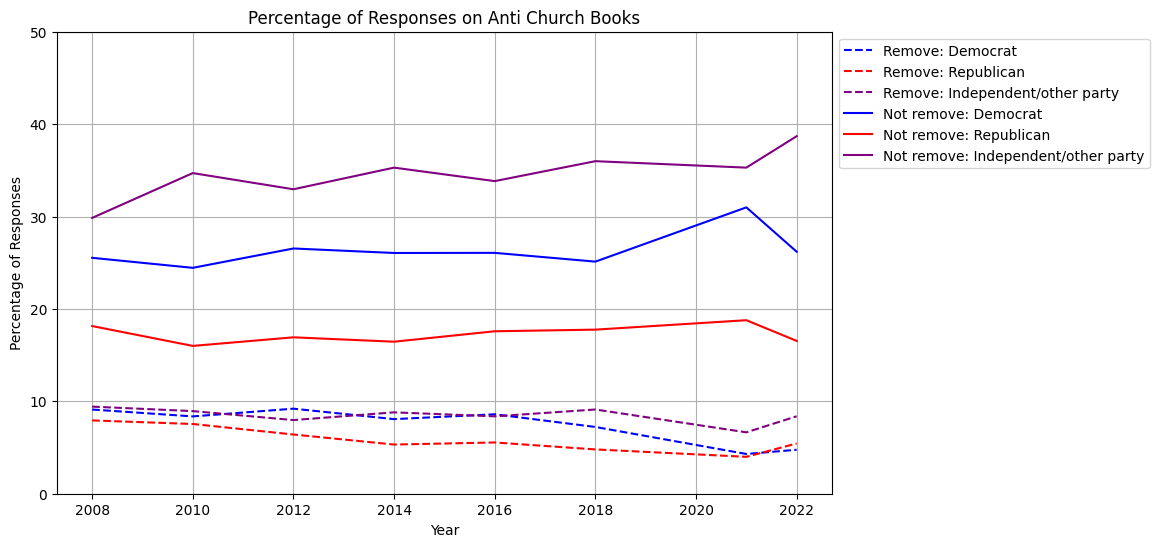

In [69]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))

colors = {'democrat': 'blue', 'republican': 'red', 'independent/other party': 'purple'}
linestyles = {'remove': '--', 'not remove': '-'}

total_counts = org_party_church_race_religion.groupby(['year']).size().reset_index(name='TotalCount')

for opinion in ['remove', 'not remove']:
    for party in ['democrat', 'republican', 'independent/other party']:
        filtered_df = org_party_church_race_religion[(org_party_church_race_religion['AntiChurchBook'] == opinion) & (org_party_church_race_religion['party_grouped'] == party)]

        response_count = filtered_df.groupby('year').size().reset_index(name='Count')
        response_count = response_count.merge(total_counts, on=['year'])
        response_count['Percentage'] = (response_count['Count'] / response_count['TotalCount']) * 100

        label = f'{opinion.capitalize()}: {party.capitalize()}'
        plt.plot(
            response_count['year'],
            response_count['Percentage'],
            label=label,
            color=colors[party],
            linestyle=linestyles[opinion]
        )

ax.set_ylim(0, 50)
plt.xlabel('Year')
plt.ylabel('Percentage of Responses')
plt.title('Percentage of Responses on Anti Church Books')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)

plt.show()